In [1]:
# Instalar pacotes necessários (executar apenas uma vez)
%pip install pandas numpy matplotlib seaborn scikit-learn

# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Nome do arquivo
file_path = "seeds_dataset.txt"

# Definindo os nomes das colunas com base na descrição
columns = [
    "Area",
    "Perimeter",
    "Compactness",
    "Kernel_Length",
    "Kernel_Width",
    "Asymmetry_Coeff",
    "Kernel_Groove_Length",
    "Class"
]

# Carregando o dataset
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

Note: you may need to restart the kernel to use updated packages.


Nesta etapa, carregamos os dados, exploramos distribuições, verificamos outliers e aplicamos padronização aos atributos para melhorar a performance de algoritmos sensíveis a escalas.

Estatísticas Descritivas:
             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coeff  Kernel_Groove_Length       Class  
count       210.000000            210.000000  210.000000  
mean          3.700201              5.408071    2.000000  
std           1.503557              0.491480    0.818448  
min           0.765100              4.519000    1.000000  
25%

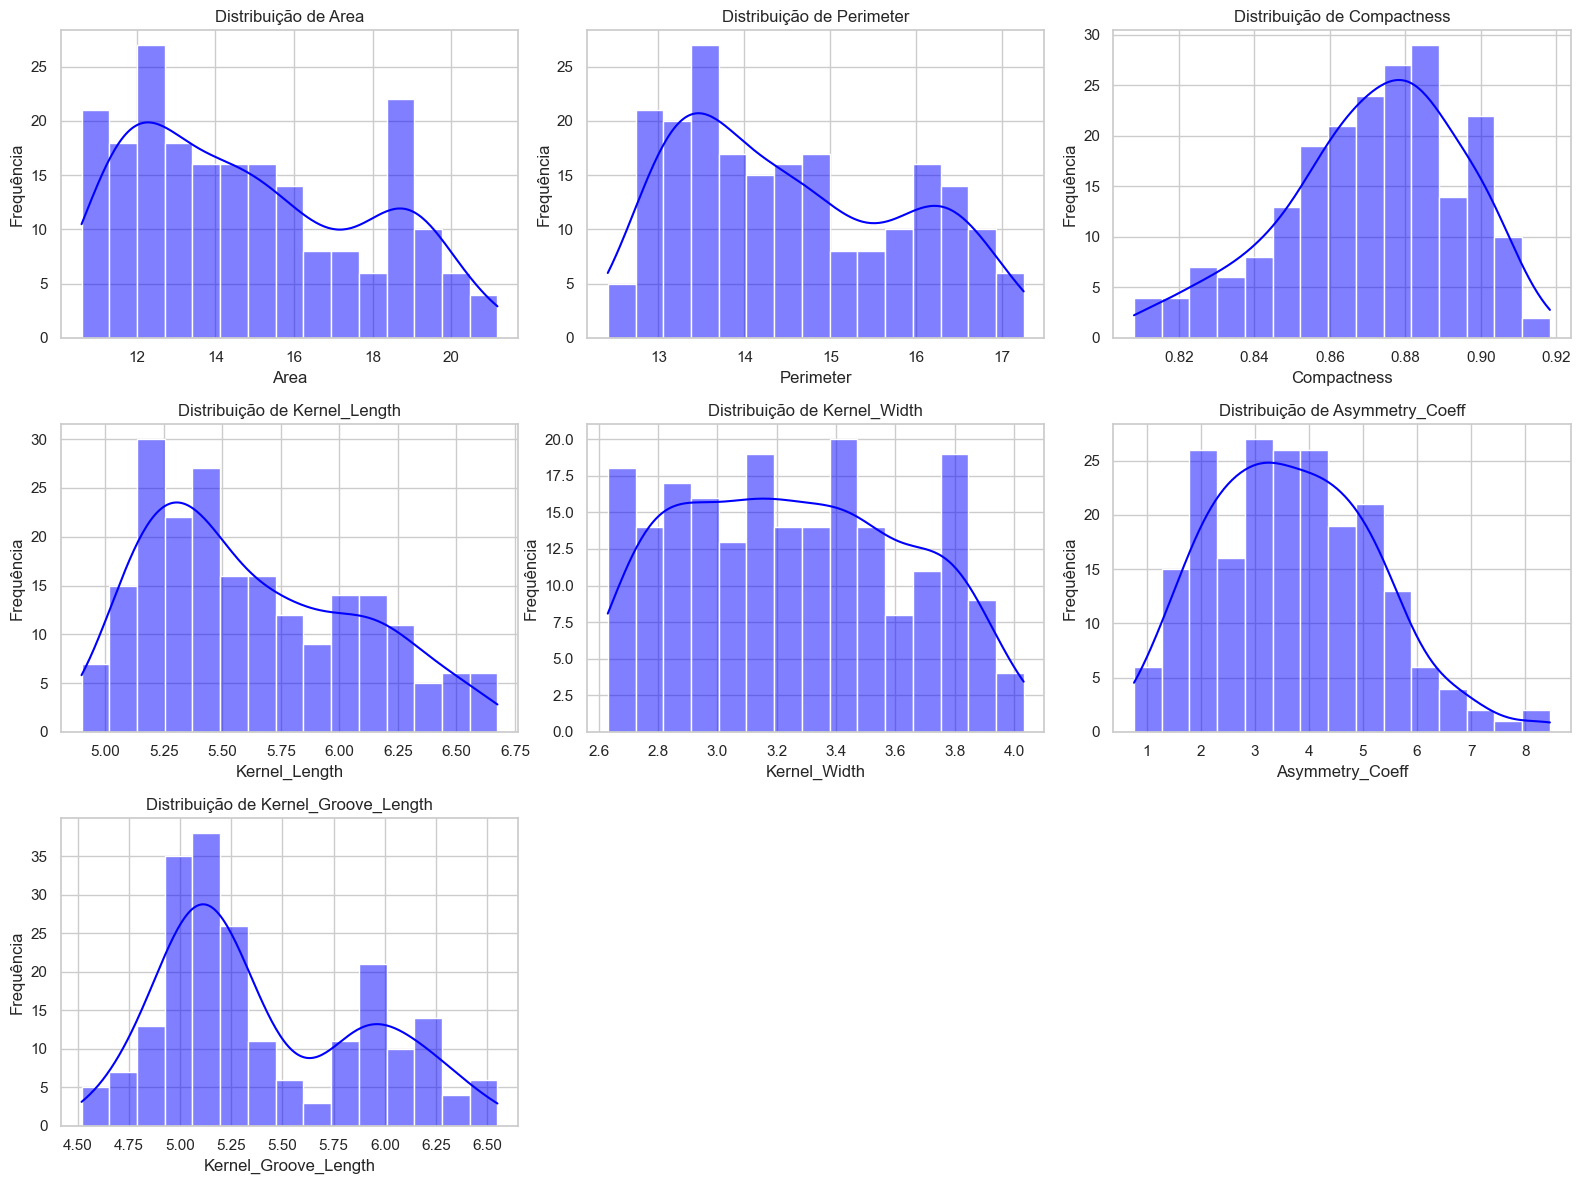

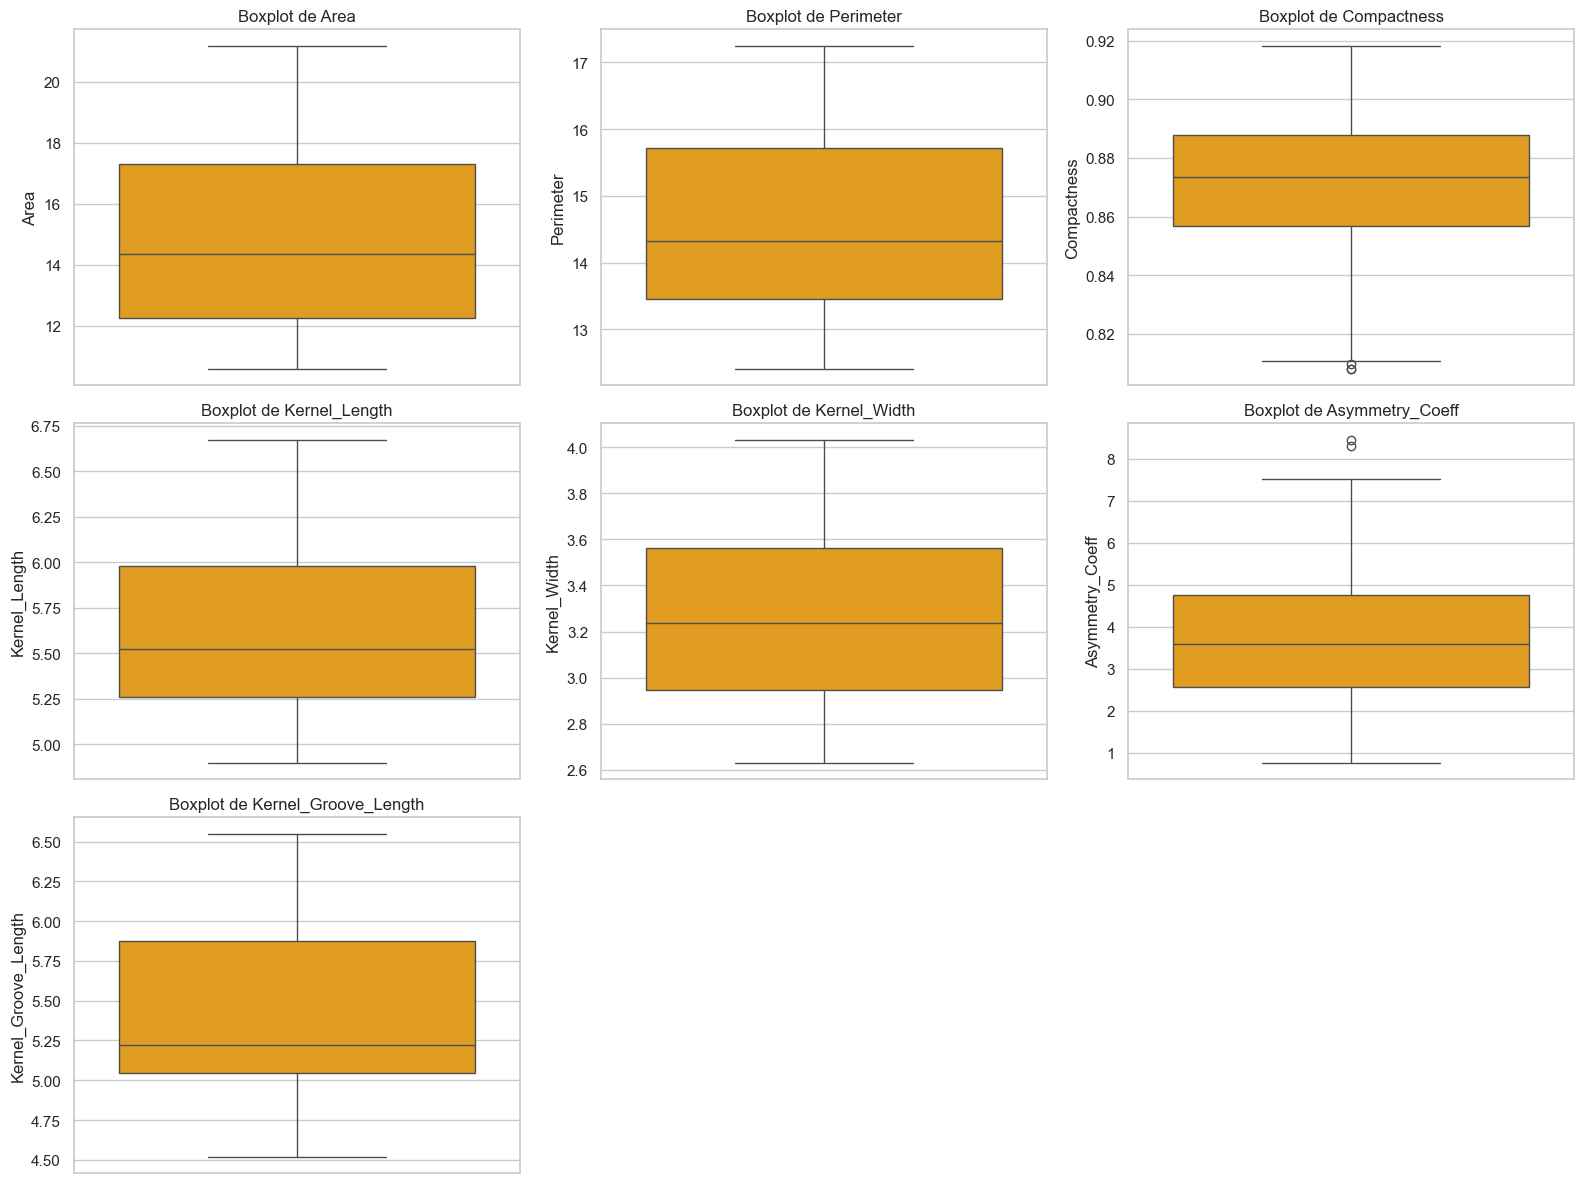

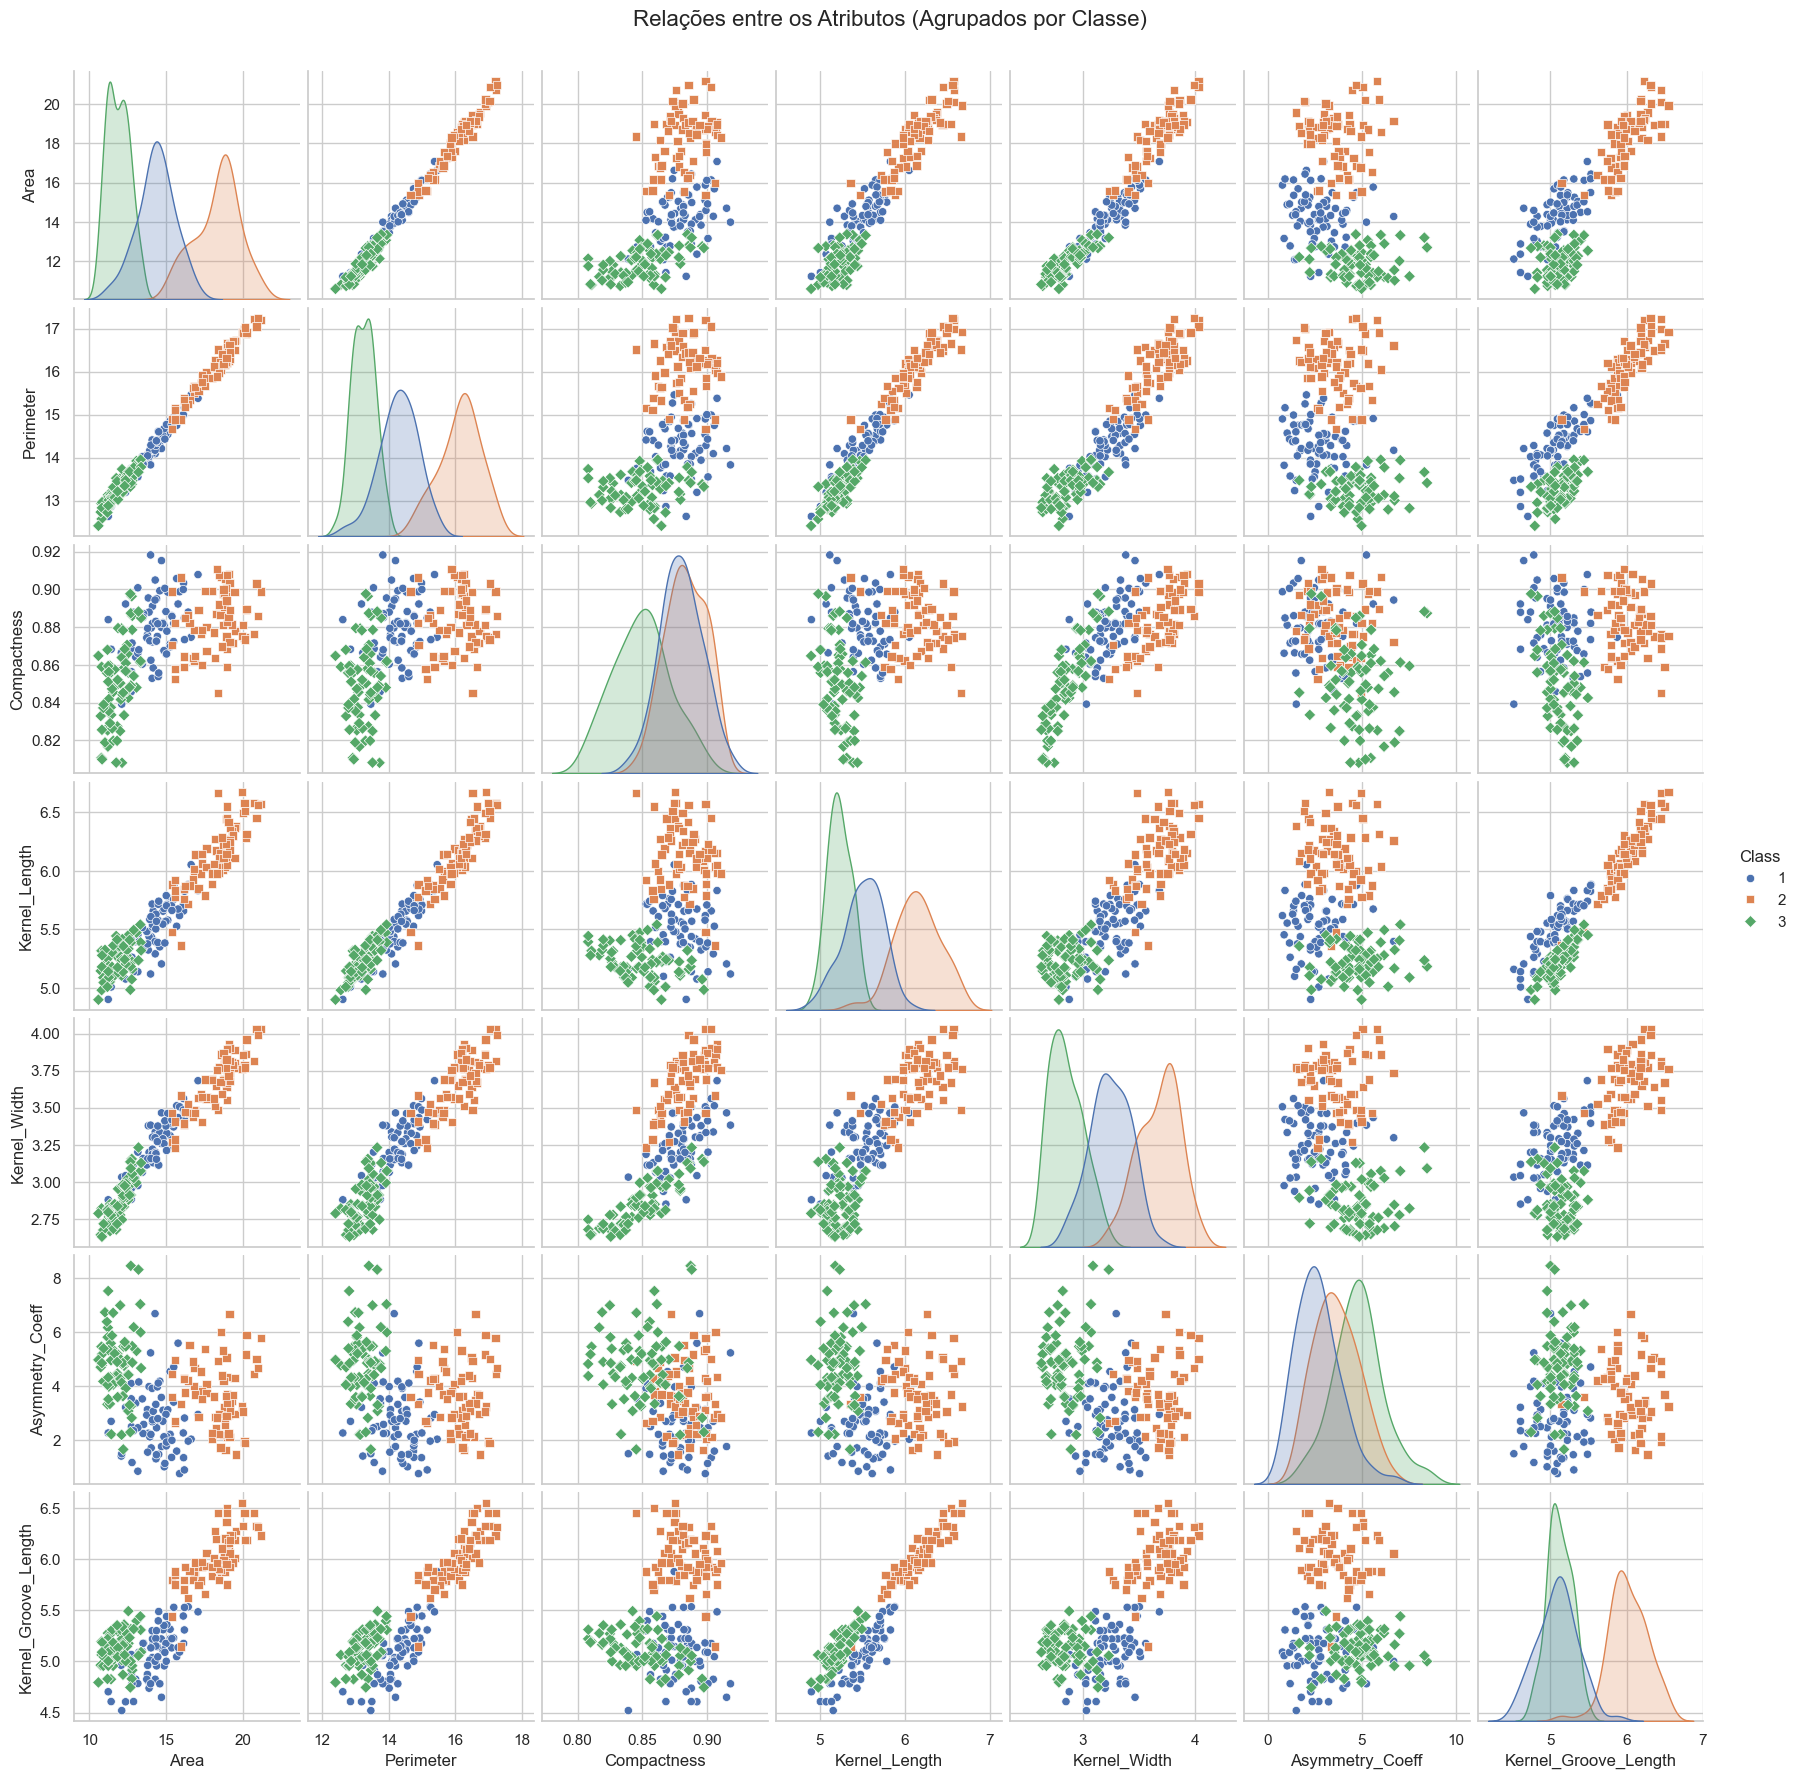


Valores ausentes no conjunto de dados:
Area                    0
Perimeter               0
Compactness             0
Kernel_Length           0
Kernel_Width            0
Asymmetry_Coeff         0
Kernel_Groove_Length    0
Class                   0
dtype: int64


In [2]:
# Estatísticas descritivas
print("Estatísticas Descritivas:")
print(data.describe())

# Visualizações: Histogramas
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, bins=15, color="blue")
    plt.title(f'Distribuição de {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column], color="orange")
    plt.title(f'Boxplot de {column}', fontsize=12)
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Gráficos de dispersão
sns.pairplot(data, hue="Class", diag_kind="kde", palette="deep", markers=["o", "s", "D"])
plt.suptitle('Relações entre os Atributos (Agrupados por Classe)', y=1.02, fontsize=16)
plt.show()

# Verificação de valores ausentes
print("\nValores ausentes no conjunto de dados:")
print(data.isnull().sum())

# Normalização/Padrão dos dados
scaler = StandardScaler()
features = data.columns[:-1]  # Excluímos a coluna de classe
data[features] = scaler.fit_transform(data[features])

Aqui, dividimos os dados em conjuntos de treinamento (70%) e teste (30%), garantindo que a proporção de classes seja mantida em ambos os conjuntos.

In [3]:
# Separação dos dados em treino e teste
X = data[features]
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Nesta etapa, treinamos e avaliamos cinco modelos:

    K-Nearest Neighbors (KNN)
    Support Vector Machine (SVM)
    Random Forest
    Naive Bayes
    Logistic Regression

Cada modelo é avaliado com métricas de acurácia, precisão, recall, F1-score, e matriz de confusão.

In [4]:
# Modelos de classificação
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=200)
}

# Avaliação inicial dos modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusão:")
    print(confusion_matrix(y_test, y_pred))


KNN:
Acurácia: 0.873015873015873
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Matriz de confusão:
[[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]

SVM:
Acurácia: 0.873015873015873
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Matriz de confusão:
[[16  2  3]
 [ 2 19  0]
 [ 1  0 20]]

RandomForest:
Acurácia: 0.9206349206349206
            

Otimizamos os hiperparâmetros dos modelos usando Grid Search. Para cada modelo, ajustamos parâmetros como:

    KNN: Número de vizinhos.
    SVM: Parâmetro C e kernel.
    Random Forest: Número de árvores e profundidade máxima.
    Logistic Regression: Parâmetro de regularização C.

In [5]:
# Hiperparâmetros para otimização
param_grids = {
    "KNN": {'n_neighbors': range(1, 20)},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "RandomForest": {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    "LogisticRegression": {'C': [0.1, 1, 10]},
}

# Otimização e avaliação após Grid Search
optimized_models = {}
for name, model in models.items():
    if name in param_grids:  # Apenas modelos com hiperparâmetros definidos
        print(f"\nOtimização de hiperparâmetros para {name}:")
        grid = GridSearchCV(model, param_grids[name], scoring='accuracy', cv=5)
        grid.fit(X_train, y_train)
        optimized_models[name] = grid.best_estimator_
        print(f"Melhores hiperparâmetros para {name}: {grid.best_params_}")
        y_pred = grid.best_estimator_.predict(X_test)
        print("Acurácia (otimizado):", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Matriz de confusão (otimizado):")
        print(confusion_matrix(y_test, y_pred))
    else:
        # Modelos sem otimização
        optimized_models[name] = model


Otimização de hiperparâmetros para KNN:
Melhores hiperparâmetros para KNN: {'n_neighbors': 1}
Acurácia (otimizado): 0.9047619047619048
              precision    recall  f1-score   support

           1       0.89      0.81      0.85        21
           2       0.95      0.90      0.93        21
           3       0.88      1.00      0.93        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63

Matriz de confusão (otimizado):
[[17  1  3]
 [ 2 19  0]
 [ 0  0 21]]

Otimização de hiperparâmetros para SVM:
Melhores hiperparâmetros para SVM: {'C': 10, 'kernel': 'linear'}
Acurácia (otimizado): 0.873015873015873
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87       

In [6]:
# Resumo dos resultados com destaque para o melhor modelo
model_scores = {}

print("\nResumo dos Resultados:")
for name, model in optimized_models.items():
    # Predições e métricas
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy  # Armazenando a acurácia para comparação

    print(f"\nModelo: {name}")
    print("Acurácia:", accuracy)
    print(classification_report(y_test, y_pred))
    print("Matriz de confusão:")
    print(confusion_matrix(y_test, y_pred))

# Ordenar os modelos pela acurácia
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Exibir o melhor modelo
print("\n=== Melhor Modelo ===")
best_model_name, best_accuracy = sorted_models[0]
print(f"O melhor modelo é {best_model_name} com acurácia de {best_accuracy:.2f}")

# Resumo organizado
print("\n=== Resumo Geral ===")
for name, score in sorted_models:
    print(f"{name}: Acurácia = {score:.2f}")



Resumo dos Resultados:

Modelo: KNN
Acurácia: 0.9047619047619048
              precision    recall  f1-score   support

           1       0.89      0.81      0.85        21
           2       0.95      0.90      0.93        21
           3       0.88      1.00      0.93        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63

Matriz de confusão:
[[17  1  3]
 [ 2 19  0]
 [ 0  0 21]]

Modelo: SVM
Acurácia: 0.873015873015873
              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.95      0.86      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.88      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63

Matriz de confusão:
[[17  1  3]
 [ 3 18  0]
 [ 1  0 20]]

Modelo: RandomFo

Finalmente, resumimos o desempenho dos modelos otimizados e destacamos o melhor modelo com base em acurácia e outras métricas.